In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import chi2
import os.path as path
import wget

In [2]:
file = 'Data/Minimos.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)
sigma = np.array([ 10. for i in range(N) ])
sigma

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.])

<ErrorbarContainer object of 3 artists>

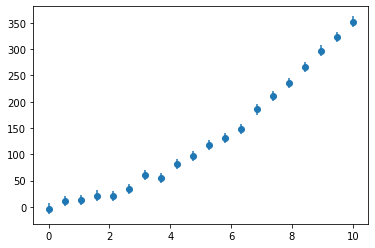

In [4]:
plt.errorbar(x,y,yerr=sigma,fmt='o')

In [5]:
def GetFit(x,y,n):
    
    DataSize = x.shape[0]
    
    b = y
    
    A = np.ones((DataSize,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    AT = np.dot(A.T,A)
    bT = A.T @ b

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [16]:
param = GetFit(x,y,16)
param

array([-3.30559559e+00,  6.75301815e+00,  1.09166413e+02, -2.10013135e+02,
        1.68565986e+02, -6.98422802e+01,  1.53167884e+01, -1.42988661e+00,
       -3.93363630e-02,  8.98787041e-03,  2.52371003e-03, -4.00984961e-04,
       -1.94041589e-05,  7.96317078e-06, -6.47657340e-07,  2.05761912e-08,
       -1.75081372e-10])

In [17]:
def GetModel(x,p):
    
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

In [18]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

-1.75081371857512e-10*x**16 + 2.05761911554854e-8*x**15 - 6.47657340430166e-7*x**14 + 7.96317078103588e-6*x**13 - 1.9404158867384e-5*x**12 - 0.00040098496084566*x**11 + 0.00252371002527252*x**10 + 0.00898787041026299*x**9 - 0.0393363629812453*x**8 - 1.42988661408185*x**7 + 15.3167883516783*x**6 - 69.8422801534003*x**5 + 168.565986453785*x**4 - 210.013134744947*x**3 + 109.166412988684*x**2 + 6.7530181514942*x - 3.30559558807345

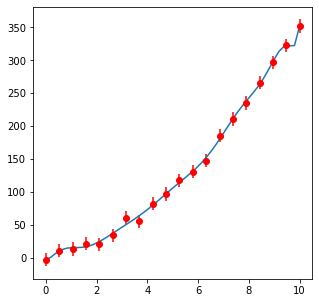

In [19]:
t = np.linspace(np.min(x),np.max(x),50)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='r')
ax.plot(t,GetModel(t,param))